## Imports

In [1]:
from __future__ import print_function, division
%matplotlib inline

# import used packages and modules
# import display function to display the table of the pandas dataframe
from IPython.display import display

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

/Users/mihaivisuian/.virtualenvs/iaml_env/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
train_calton_hill = pd.read_csv('../data/calton_hill_2.csv')
train_nicholson = pd.read_csv('../data/nicholson_south_clerk-06-11-2017-midday.csv')
train_meadows = pd.read_csv('../data/meadows-06-11-2017-midday.csv')
train_meadows_bike = pd.read_csv('../data/20150616.csv')


print("Number of training data points on calton hill data: {}".format(train_calton_hill.shape[0]))
print("Number of training attributes on calton hill data: {}".format(train_calton_hill.shape[1]))

print("Number of training attributes on meadows data: {}".format(train_meadows.shape[0]))
print("Number of training attributes on meadows data: {}".format(train_meadows.shape[1]))

Number of training data points on calton hill data: 365
Number of training attributes on calton hill data: 29
Number of training attributes on meadows data: 82
Number of training attributes on meadows data: 28


In [3]:
combined_nicholson = pd.concat([train_calton_hill, train_nicholson])
combined_nicholson.reset_index(drop=True, inplace=True)
print("Shape of combined dataset: {}".format(combined_nicholson.shape))

Shape of combined dataset: (404, 29)


## Display of Data

In [4]:
display(combined_nicholson.loc[combined_nicholson['outdoors']==1])

,phoneTimestamp,pm1,pm2_5,pm10,temperature,humidity,bin0,bin1,bin2,bin3,...,bin13,bin14,bin15,total,gpsLongitude,gpsLatitude,gpsAltitude,gpsAccuracy,exposureStatus,outdoors
0,1507285893781,0.074904,0.193888,0.216183,NaN,NaN,30,5,1,1,...,0,0,0,40,-3.182539,55.942707,0.0,800.000,0,1
1,1507285917834,0.091550,0.224822,0.319140,25.200000,34.700000,28,12,1,3,...,0,0,0,45,-3.182539,55.942707,0.0,800.000,0,1
2,1507285932787,0.056121,0.066516,0.066642,25.200000,34.700000,30,4,2,0,...,0,0,0,36,-3.182539,55.942707,0.0,800.000,0,1
3,1507285952329,0.080267,0.094990,0.095129,25.200000,34.700000,30,13,2,0,...,0,0,0,45,-3.182539,55.942707,0.0,800.000,0,1
4,1507285973742,0.057424,0.065056,0.065125,25.200000,34.700000,32,6,1,0,...,0,0,0,39,-3.182539,55.942707,0.0,800.000,0,1
5,1507285991326,0.060220,0.066363,0.066382,25.200000,34.700000,27,10,0,0,...,0,0,0,37,-3.182539,55.942707,0.0,800.000,0,1
6,1507286010817,0.096218,0.299564,0.414763,25.200000,34.700000,29,9,2,2,...,0,0,0,45,-3.182539,55.942707,0.0,800.000,0,1
7,1507286030397,0.091768,0.244935,0.614456,25.200000,34.600002,40,8,1,2,...,0,0,0,53,-3.182539,55.942707,0.0,800.000,0,1
8,1507286049829,0.051395,0.104821,0.119954,25.200000,34.600002,22,8,0,0,...,0,0,0,31,-3.182539,55.942707,0.0,800.000,0,1
9,1507286069289,0.072685,0.145500,0.152943,25.200000,34.600002,26,7,1,1,...,0,0,0,37,-3.182539,55.942707,0.0,800.000,0,1


## Bins Analysis

In [5]:
bins = ['bin{}'.format(i) for i in xrange(0,16)]

In [6]:
pm_vals = ['pm1', 'pm2_5', 'pm10']

In [7]:
x_combined_pm_vals = combined_nicholson.loc[combined_nicholson['outdoors']==1][pm_vals]

meadows_bike_pm_vals = train_meadows_bike[pm_vals]
meadows_walk_pm_vals = train_meadows[pm_vals]
x_combined_meadows_pm_vals = pd.concat([meadows_bike_pm_vals, meadows_walk_pm_vals])
x_combined_meadows_pm_vals.reset_index(inplace=True, drop=True)

y_combined_meadows = pd.concat([train_meadows['exposureStatus'], train_meadows_bike['exposureStatus']])
y_combined_meadows.reset_index(inplace=True, drop=True)

In [8]:
x_bins = train_calton_hill[bins]
y_bins = train_calton_hill['exposureStatus']
# get only the outdoors features
x_combined_bins = combined_nicholson.loc[combined_nicholson['outdoors']==1][bins]
y_combined = combined_nicholson.loc[combined_nicholson['outdoors']==1]['exposureStatus']

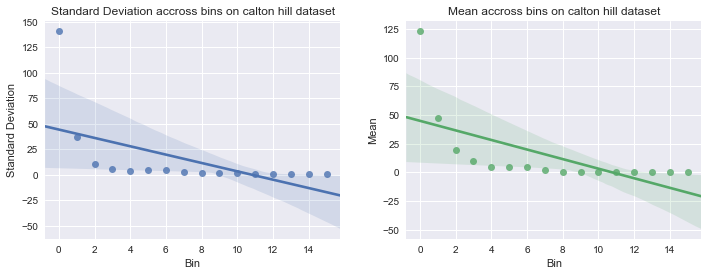

In [9]:
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,4), sharex=True)

val_stds = np.std(x_combined_bins[bins])
val_means = np.mean(x_combined_bins[bins])

ax1.set_title('Standard Deviation accross bins on calton hill dataset')
ax2.set_title('Mean accross bins on calton hill dataset')


sns.regplot(np.arange(0,16), val_stds, ax=ax1)
sns.regplot(np.arange(0,16), val_means, ax=ax2)

ax1.set_ylabel('Standard Deviation')
ax1.set_xlabel('Bin')
ax2.set_ylabel('Mean')
ax2.set_xlabel('Bin')

plt.tight_layout()
plt.show()

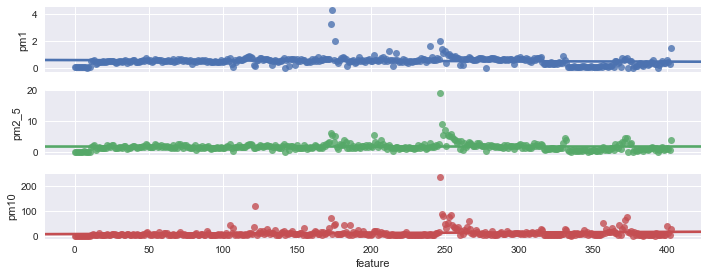

In [10]:
pm1 = combined_nicholson['pm1']
pm2_5 = combined_nicholson['pm2_5']
pm10 = combined_nicholson['pm10']

f, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(10,4), sharex=True)


sns.regplot(np.arange(0,404), pm1, ax=ax1)
sns.regplot(np.arange(0,404), pm2_5, ax=ax2)
sns.regplot(np.arange(0,404), pm10, ax=ax3)

plt.xlabel('feature')

plt.tight_layout()
plt.show()

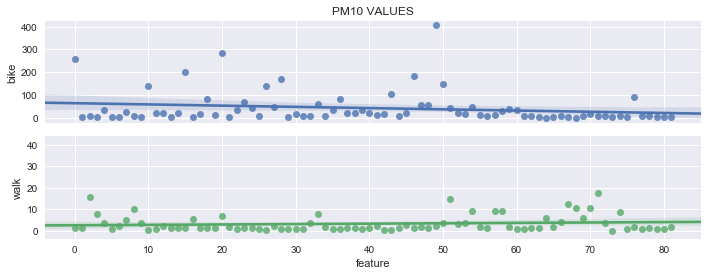

In [79]:
pm10_meadows_bike = meadows_bike_pm_vals['pm10']
pm10_meadows_walk = meadows_walk_pm_vals['pm10']

f, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10,4), sharex=True)


sns.regplot(np.arange(0,82), pm10_meadows_bike[:82], ax=ax1)
sns.regplot(np.arange(0,82), pm10_meadows_walk, ax=ax2)

ax1.set_title('PM10 VALUES')

ax1.set_ylabel('bike')
ax2.set_ylabel('walk')

plt.xlabel('feature')

plt.tight_layout()
plt.show()

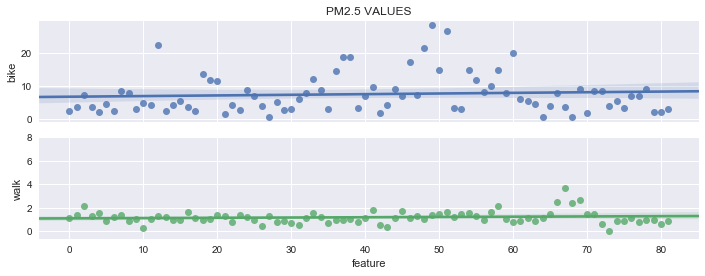

In [77]:
pm2_5_meadows_bike = meadows_bike_pm_vals['pm2_5']
pm2_5_meadows_walk = meadows_walk_pm_vals['pm2_5']

f, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10,4), sharex=True)


sns.regplot(np.arange(0,82), pm2_5_meadows_bike[:82], ax=ax1)
sns.regplot(np.arange(0,82), pm2_5_meadows_walk, ax=ax2)

plt.xlabel('feature')

ax1.set_title('PM2.5 VALUES')

ax1.set_ylabel('bike')
ax2.set_ylabel('walk')

plt.tight_layout()
plt.show()

In [11]:
lr = LogisticRegression(solver='lbfgs')

# fit it on the training and validation datasets and report the accuracy score
lr.fit(x_combined_bins, y_combined)
print('Classification accuracy on training set: {}'.format(lr.score(x_combined_bins, y_combined)))

Classification accuracy on training set: 0.84900990099


In [12]:
lr_meadows_midday = LogisticRegression(solver='lbfgs')

lr_meadows_midday.fit(x_combined_meadows_pm_vals, y_combined_meadows)
print('Classification accuracy on training set: {}'.format(lr_meadows_midday.score(x_combined_meadows_pm_vals, y_combined_meadows)))

Classification accuracy on training set: 0.918407960199


In [13]:
lrpm = LogisticRegression(solver='lbfgs')

lrpm.fit(x_combined_pm_vals, y_combined)
print('Classification accuracy on PM values training set: {}'.format(lrpm.score(x_combined_pm_vals, y_combined)))

Classification accuracy on PM values training set: 0.84900990099


In [14]:
std_scaler = StandardScaler()
std_scaler.fit(x_combined_bins)
x_combined_bins_transformed = std_scaler.transform(x_combined_bins)

In [15]:
std_scaler2 = StandardScaler()
std_scaler2.fit(x_combined_pm_vals)
x_combined_pm_vals_transformed = std_scaler2.transform(x_combined_pm_vals)

In [16]:
std_scaler_meadows = StandardScaler()
std_scaler_meadows.fit(x_combined_meadows_pm_vals)
x_combined_meadows_pm_vals_transformed = std_scaler_meadows.transform(x_combined_meadows_pm_vals)

In [17]:
lr_meadows2 = LogisticRegression(solver='lbfgs')

lr_meadows2.fit(x_combined_meadows_pm_vals_transformed, y_combined_meadows)
print('Classification accuracy on PM values training set: {}'.format(lrpm.score(x_combined_meadows_pm_vals_transformed, y_combined_meadows)))

Classification accuracy on PM values training set: 0.081592039801


In [18]:
lr2 = LogisticRegression(solver='lbfgs')

lr2.fit(x_combined_bins_transformed, y_combined)
print('Classification accuracy on training set: {}'.format(lr2.score(x_combined_bins_transformed, y_combined)))

Classification accuracy on training set: 0.84900990099


In [19]:
lrpm2 = LogisticRegression(solver='lbfgs')

lrpm2.fit(x_combined_pm_vals_transformed, y_combined)
print('Classification accuracy on training set: {}'.format(lrpm2.score(x_combined_pm_vals_transformed, y_combined)))

Classification accuracy on training set: 0.84900990099


In [20]:
kf_3 = KFold(len(x_combined_bins_transformed), n_folds=3, shuffle=True, random_state=0)

for (idx, (train_feature, test_feature)) in enumerate(kf_3):
    print("Number of test samples in fold {}: {}".format(idx, len(test_feature)))

Number of test samples in fold 0: 135
Number of test samples in fold 1: 135
Number of test samples in fold 2: 134


In [21]:
kf_meadows = KFold(len(x_combined_meadows_pm_vals), n_folds=3, shuffle=True, random_state=0)

for (idx, (train_feature, test_feature)) in enumerate(kf_meadows):
    print("Number of test samples in fold {}: {}".format(idx, len(test_feature)))

Number of test samples in fold 0: 335
Number of test samples in fold 1: 335
Number of test samples in fold 2: 335


In [45]:
def get_training_accuracy_with_kfolds(estimator, x_tr, y_tr, kf):

    score_array = np.empty(kf.n_folds)
    
    for (idx, (train_feature, test_feature)) in enumerate(kf):
        estimator.fit(x_tr[train_feature], y_tr[train_feature])
        score_array[idx] = estimator.score(x_tr[test_feature], y_tr[test_feature])
    
    return np.mean(score_array)

In [60]:
def get_training_accuracy_with_kfolds_iloc(estimator, x_tr, y_tr, kf):
    score_array = np.empty(kf.n_folds)
    
    for (idx, (train_feature, test_feature)) in enumerate(kf):
        estimator.fit(x_tr.iloc[train_feature], y_tr.iloc[train_feature])
        score_array[idx] = estimator.score(x_tr.iloc[test_feature], y_tr.iloc[test_feature])
    
    return np.mean(score_array)

In [61]:
lr_kfold = LogisticRegression(solver='lbfgs')

print('Classification accuracy on training set after kfold validation: {}'.format(
    get_training_accuracy_with_kfolds(lr_kfold, x_combined_bins_transformed, y_combined, kf_3)))

Classification accuracy on training set after kfold validation: 0.839119218721


In [62]:
lrpm_kfold = LogisticRegression(solver='lbfgs')

print('Classification accuracy on training set after kfold validation: {}'.format(
    get_training_accuracy_with_kfolds(lrpm_kfold, x_combined_pm_vals_transformed, y_combined, kf_3)))

Classification accuracy on training set after kfold validation: 0.849014188318


In [63]:
lrpm_kfold_meadows = LogisticRegression(solver='lbfgs')

print('Classification accuracy on training set after kfold validation: {}'.format(
    get_training_accuracy_with_kfolds_iloc(lrpm_kfold, x_combined_meadows_pm_vals, y_combined_meadows, kf_meadows)))

Classification accuracy on training set after kfold validation: 0.917412935323


Results with linear kernel:
Accuracy: 0.851501750507
Results with rbf kernel:
Accuracy: 0.851501750507
Results with poly kernel:
Accuracy: 0.844057490326


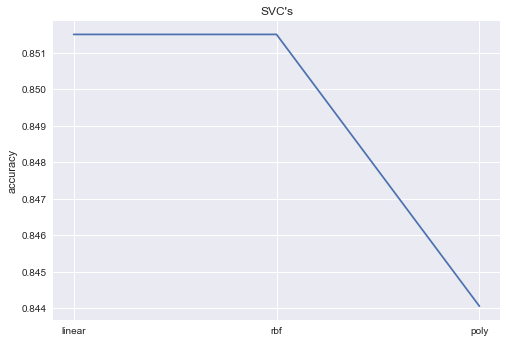

In [54]:
kernels = (
    'linear',
    'rbf',
    'poly',
)
svcs = [SVC(kernel=k, gamma='auto', probability=True) for k in kernels]

results = []
for idx, k in enumerate(kernels):
    print("Results with {} kernel:".format(k))
    res = get_training_accuracy_with_kfolds(svcs[idx], x_combined_bins_transformed, y_combined, kf_3)
    results.append(res)
    print("Accuracy: {}".format(res))


plt.plot(results)
plt.title("SVC's")
plt.ylabel('accuracy')
plt.xticks((0,1,2), kernels)

plt.show()

In [55]:
svc_rbf_pm = SVC(kernel='rbf', gamma='auto', probability=True)

print('Classification accuracy on training set after kfold validation: {}'.format(
    get_training_accuracy_with_kfolds(svc_rbf_pm, x_combined_pm_vals_transformed, y_combined, kf_3)))

Classification accuracy on training set after kfold validation: 0.851501750507


In [81]:
svc_rbf_pm_meadows = SVC(kernel='rbf', gamma='auto', probability=True)

print('Classification accuracy on training set after kfold validation: {}'.format(
    get_training_accuracy_with_kfolds_iloc(svc_rbf_pm_meadows, x_combined_meadows_pm_vals, y_combined_meadows, kf_meadows)))

Classification accuracy on training set after kfold validation: 0.918407960199


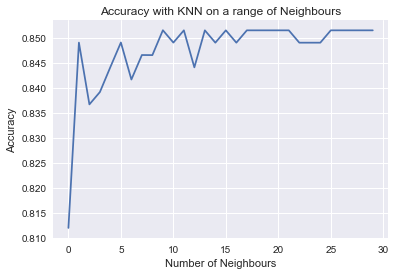

Maximum Accuracy: 0.851520176893


In [84]:
results = []

for n_neigh in range(1,31):    
    knn = KNeighborsClassifier(n_neighbors=n_neigh)
    res = get_training_accuracy_with_kfolds(knn, x_combined_bins_transformed, y_combined, kf_3)
    results.append(res)

plt.title('Accuracy with KNN on a range of Neighbours')
plt.xlabel('Number of Neighbours')
plt.ylabel('Accuracy')
plt.plot(results)
plt.show()
print("Maximum Accuracy: {}".format(max(results)))

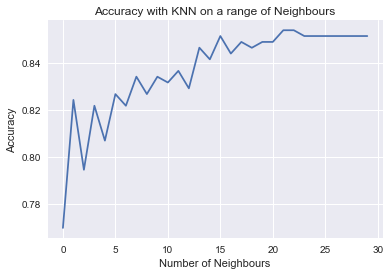

Maximum Accuracy: 0.853970886309


In [83]:
results = []

for n_neigh in range(1,31):    
    knn = KNeighborsClassifier(n_neighbors=n_neigh)
    res = get_training_accuracy_with_kfolds(knn, x_combined_pm_vals_transformed, y_combined, kf_3)
    results.append(res)

plt.title('Accuracy with KNN on a range of Neighbours')
plt.xlabel('Number of Neighbours')
plt.ylabel('Accuracy')
plt.plot(results)
plt.show()
print("Maximum Accuracy: {}".format(max(results)))

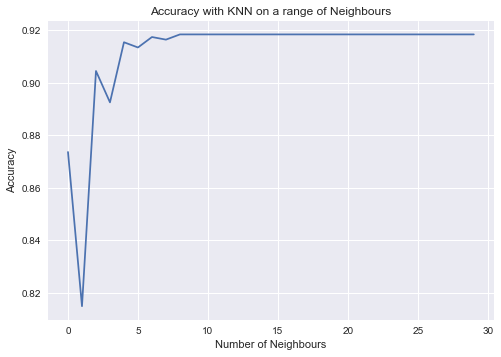

Maximum Accuracy: 0.918407960199


In [80]:
results = []

for n_neigh in range(1,31):    
    knn = KNeighborsClassifier(n_neighbors=n_neigh)
    res = get_training_accuracy_with_kfolds_iloc(knn, x_combined_meadows_pm_vals, y_combined_meadows, kf_meadows)
    results.append(res)

plt.title('Accuracy with KNN on a range of Neighbours')
plt.xlabel('Number of Neighbours')
plt.ylabel('Accuracy')
plt.plot(results)
plt.show()
print("Maximum Accuracy: {}".format(max(results)))

In [110]:
rf_bins = RandomForestClassifier(n_estimators=500, random_state=13, criterion='entropy', n_jobs=-1)

print('Classification accuracy on training set after kfold validation: {}'.format(
    get_training_accuracy_with_kfolds(rf_bins, x_combined_bins_transformed, y_combined, kf_3)))

Classification accuracy on training set after kfold validation: 0.851501750507


In [111]:
rf_bins = RandomForestClassifier(n_estimators=500, random_state=13, criterion='entropy', n_jobs=-1)

print('Classification accuracy on training set after kfold validation: {}'.format(
    get_training_accuracy_with_kfolds(rf, x_combined_pm_vals_transformed, y_combined, kf_3)))

Classification accuracy on training set after kfold validation: 0.831711811314
